# Particle Swarm Optimization
## Problem: Minimize the Rosenbrock function
$f(x) = \sum_{i=1}^{D-1} \left[100(x_{i+1} - x_i^2)^2 + (x_i-1)^2\right]$
- Dimensions: $D = 10$
- Domain: $x_i\in [-5, 10]\forall i=1,...,D$
- Global minimum: $f(x^*)=0\leftarrow x^*=(1,...,1)$

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
class Problem:
    def __init__(self, dim, lowerbound, upperbound):
        self.D = dim
        self.LB = lowerbound
        self.UB = upperbound

    def cal_objective(self, solution: np.ndarray) -> float:
        fx = np.sum(100 * np.square((solution[1:] - np.square(solution[:-1]))) + np.square(solution[:-1] - 1))
        return fx

In [34]:
class Particle:
    def __init__(self):
        self.X = None # current position
        self.V = None # current velocity
        self.P = None        # personal best position
        self.p_best = float('inf') # personal best fitness
        self.fitness = None
    
    def random_gen(self, problem: Problem):
        self.X = np.random.uniform(problem.LB, problem.UB, problem.D)
        self.V = np.random.uniform(problem.LB - problem.UB, problem.UB - problem.LB, problem.D)
        
    def evaluate(self, problem: Problem):
        self.fitness = problem.cal_objective(self.X)
        if self.fitness < self.p_best:
            self.p_best = self.fitness
            self.P = self.X
            
    def update_velocity(self, G: np.ndarray, c1: float, c2: float):
        r = np.random.random(size=2)
        self.V = self.V + c1 * r[0] * (self.P - self.X) + c2 * r[1] * (G - self.X)
        
    def update_position(self, problem: Problem):
        self.X = self.X + self.V
        self.X = np.clip(self.X, problem.LB, problem.UB) # repair

In [35]:
class Population:
    def __init__(self, pop_size):
        self.pop_size = pop_size # number of particles
        self.pop = [] # list of particles
        self.G = None # global best position 
        self.g_best = float('inf') # global best fitness
        
    
    def gen_random(self, problem: Problem):
        for _ in range(self.pop_size):
            indiv = Particle()
            indiv.random_gen(problem)
            self.pop.append(indiv)
        
    def evaluate_and_update_best(self, problem: Problem):
        for indiv in self.pop:
            indiv.evaluate(problem)
            if indiv.fitness < self.g_best:
                self.g_best = indiv.fitness
                self.G = indiv.X

In [36]:
def PSO(problem: Problem, c1: float, c2: float, max_iter: int, pop_size):
    history = []
    population = Population(pop_size)
    population.gen_random(problem)
    population.evaluate_and_update_best(problem)
    history.append(population.g_best)
    print(f"Generation 0, best fitness = {population.g_best}")

    for k in range(1, max_iter):
        for indiv in population.pop:
            indiv.update_velocity(population.G, c1, c2)
            indiv.update_position(problem)
        population.evaluate_and_update_best(problem)
        history.append(population.g_best)
        if k % 10 == 0:
            print(f"Generation {k}, best fitness = {population.g_best}")        
    return history

In [37]:
# Problem setup
D = 10
LB = -5
UB = 10
Rosenbrock = Problem(D, LB, UB)
# Parameter setup
pop_size = 200
c1 = 1.5
c2 = 2.0
max_iter = 1000

# Swarm search
history = PSO(Rosenbrock, c1, c2, max_iter, pop_size)

Generation 0, best fitness = 47443.68295552744
Generation 10, best fitness = 6849.563321612479
Generation 20, best fitness = 1330.513131938866
Generation 30, best fitness = 491.09548709381784
Generation 40, best fitness = 458.7565614934307
Generation 50, best fitness = 230.22918841811767
Generation 60, best fitness = 141.82639694936069
Generation 70, best fitness = 141.82639694936069
Generation 80, best fitness = 141.82639694936069
Generation 90, best fitness = 141.82639694936069
Generation 100, best fitness = 141.82639694936069
Generation 110, best fitness = 113.97468559130962
Generation 120, best fitness = 105.25349611997753
Generation 130, best fitness = 91.51806439014786
Generation 140, best fitness = 91.51806439014786
Generation 150, best fitness = 91.51806439014786
Generation 160, best fitness = 73.39871854862724
Generation 170, best fitness = 73.39871854862724
Generation 180, best fitness = 72.64319629962792
Generation 190, best fitness = 72.64319629962792
Generation 200, best f

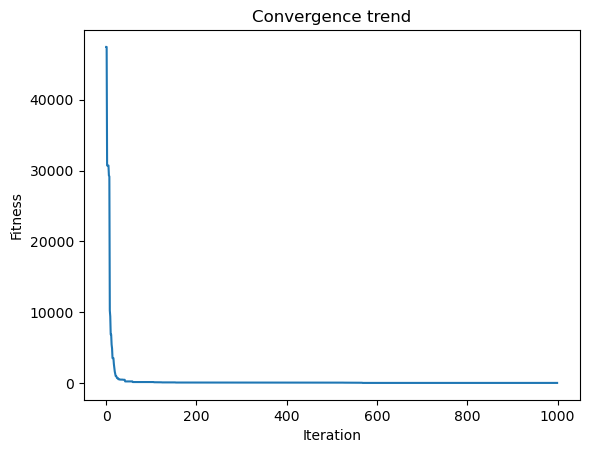

In [38]:
plt.plot(history)
plt.title('Convergence trend')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.show()